# Covid - Pneunmonia Classfication Model from X-ray images

In this project, I will develop a deep learning model that can support doctors with diagnosing lung illnesses.  

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [199]:
training_data_generator = ImageDataGenerator(rescale = 1.0/255,zoom_range =.2,rotation_range =15,width_shift_range = .05,height_shift_range=.05)

In [200]:
DIRECTORY = "/Users/PJMoon/Data_Science_Projects/Covid_Pneumonia_Classification/Covid19-dataset/train/"
DIRECTORY2 = "/Users/PJMoon/Data_Science_Projects/Covid_Pneumonia_Classification/Covid19-dataset/test/"
CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 50

In [201]:
training_iterator = training_data_generator.flow_from_directory(DIRECTORY,class_mode=CLASS_MODE,color_mode=COLOR_MODE,target_size=TARGET_SIZE,batch_size=BATCH_SIZE)

Found 251 images belonging to 3 classes.


In [202]:
validation_data_generator = ImageDataGenerator(rescale=1.0/255)

In [203]:
validation_iterator= validation_data_generator.flow_from_directory(DIRECTORY2,class_mode=CLASS_MODE,color_mode = COLOR_MODE, batch_size=BATCH_SIZE)

Found 66 images belonging to 3 classes.


In [204]:
model = Sequential()

In [205]:
model.add(InputLayer(input_shape=(256,256,1)))

#create a convolutional layer
model.add(Conv2D(16,7,activation = 'relu',strides = 3,padding='same'))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model.add(Conv2D(16,7,activation='relu',strides = 1,padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

In [206]:
785*16

12560

In [207]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 86, 86, 16)        800       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 17, 17, 16)        12560     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 3075      
Total params: 16,435
Trainable params: 16,435
Non-trainable params: 0
_________________________________________________

In [208]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.005)
loss = tf.keras.losses.CategoricalCrossentropy()
es = EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=20)

In [209]:
model.compile(optimizer = optimizer, loss = loss, metrics =[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()])

In [210]:
history = model.fit(training_iterator,steps_per_epoch=training_iterator.samples/BATCH_SIZE,epochs = 100,validation_data=validation_iterator,validation_steps=validation_iterator.samples/BATCH_SIZE,callbacks=[es])

Epoch 1/100
5/5 [==============================] - 3s 545ms/step - loss: 1.1014 - categorical_accuracy: 0.4382 - auc_9: 0.5500 - val_loss: 1.0727 - val_categorical_accuracy: 0.3939 - val_auc_9: 0.6334
Epoch 2/100
5/5 [==============================] - 2s 375ms/step - loss: 1.0973 - categorical_accuracy: 0.3865 - auc_9: 0.5741 - val_loss: 1.0680 - val_categorical_accuracy: 0.5303 - val_auc_9: 0.6861
Epoch 3/100
5/5 [==============================] - 2s 376ms/step - loss: 1.0435 - categorical_accuracy: 0.4821 - auc_9: 0.6513 - val_loss: 1.0306 - val_categorical_accuracy: 0.3182 - val_auc_9: 0.7018
Epoch 4/100
5/5 [==============================] - 2s 444ms/step - loss: 0.9488 - categorical_accuracy: 0.5538 - auc_9: 0.7863 - val_loss: 0.8688 - val_categorical_accuracy: 0.6970 - val_auc_9: 0.8456
Epoch 5/100
5/5 [==============================] - 2s 377ms/step - loss: 0.8841 - categorical_accuracy: 0.5458 - auc_9: 0.7712 - val_loss: 0.8622 - val_categorical_accuracy: 0.5152 - val_auc_9: 0.

Epoch 22/100
5/5 [==============================] - 2s 385ms/step - loss: 0.4742 - categorical_accuracy: 0.7928 - auc_9: 0.9393 - val_loss: 0.5175 - val_categorical_accuracy: 0.6818 - val_auc_9: 0.9196
Epoch 23/100
5/5 [==============================] - 2s 371ms/step - loss: 0.4174 - categorical_accuracy: 0.8406 - auc_9: 0.9511 - val_loss: 0.4267 - val_categorical_accuracy: 0.8788 - val_auc_9: 0.9574
Epoch 24/100
5/5 [==============================] - 2s 380ms/step - loss: 0.3815 - categorical_accuracy: 0.8606 - auc_9: 0.9594 - val_loss: 0.4720 - val_categorical_accuracy: 0.8182 - val_auc_9: 0.9412
Epoch 25/100
5/5 [==============================] - 2s 361ms/step - loss: 0.3342 - categorical_accuracy: 0.8765 - auc_9: 0.9683 - val_loss: 0.3878 - val_categorical_accuracy: 0.8636 - val_auc_9: 0.9592
Epoch 26/100
5/5 [==============================] - 2s 361ms/step - loss: 0.3184 - categorical_accuracy: 0.8845 - auc_9: 0.9714 - val_loss: 0.3283 - val_categorical_accuracy: 0.8939 - val_auc_

Epoch 43/100
5/5 [==============================] - 2s 362ms/step - loss: 0.3284 - categorical_accuracy: 0.8805 - auc_9: 0.9698 - val_loss: 0.6740 - val_categorical_accuracy: 0.7424 - val_auc_9: 0.8969
Epoch 44/100
5/5 [==============================] - 2s 347ms/step - loss: 0.3630 - categorical_accuracy: 0.8645 - auc_9: 0.9634 - val_loss: 0.6262 - val_categorical_accuracy: 0.7576 - val_auc_9: 0.9082
Epoch 45/100
5/5 [==============================] - 2s 363ms/step - loss: 0.3682 - categorical_accuracy: 0.8606 - auc_9: 0.9625 - val_loss: 0.5532 - val_categorical_accuracy: 0.8636 - val_auc_9: 0.9350
Epoch 46/100
5/5 [==============================] - 2s 368ms/step - loss: 0.2863 - categorical_accuracy: 0.9084 - auc_9: 0.9794 - val_loss: 0.5374 - val_categorical_accuracy: 0.8788 - val_auc_9: 0.9403
Epoch 47/100
5/5 [==============================] - 2s 360ms/step - loss: 0.2374 - categorical_accuracy: 0.9163 - auc_9: 0.9857 - val_loss: 0.5176 - val_categorical_accuracy: 0.8788 - val_auc_

Epoch 64/100
5/5 [==============================] - 2s 430ms/step - loss: 0.2272 - categorical_accuracy: 0.9124 - auc_9: 0.9856 - val_loss: 0.4937 - val_categorical_accuracy: 0.8636 - val_auc_9: 0.9419
Epoch 65/100
5/5 [==============================] - 2s 363ms/step - loss: 0.1989 - categorical_accuracy: 0.9243 - auc_9: 0.9881 - val_loss: 0.3960 - val_categorical_accuracy: 0.8182 - val_auc_9: 0.9570
Epoch 66/100
5/5 [==============================] - 2s 350ms/step - loss: 0.1838 - categorical_accuracy: 0.9283 - auc_9: 0.9881 - val_loss: 0.3539 - val_categorical_accuracy: 0.8485 - val_auc_9: 0.9688
Epoch 67/100
5/5 [==============================] - 2s 371ms/step - loss: 0.2113 - categorical_accuracy: 0.9283 - auc_9: 0.9872 - val_loss: 0.4530 - val_categorical_accuracy: 0.7879 - val_auc_9: 0.9508
Epoch 68/100
5/5 [==============================] - 2s 379ms/step - loss: 0.1740 - categorical_accuracy: 0.9283 - auc_9: 0.9917 - val_loss: 0.4197 - val_categorical_accuracy: 0.8636 - val_auc_

Epoch 85/100
5/5 [==============================] - 2s 462ms/step - loss: 0.1122 - categorical_accuracy: 0.9522 - auc_9: 0.9967 - val_loss: 0.3539 - val_categorical_accuracy: 0.8788 - val_auc_9: 0.9650
Epoch 86/100
5/5 [==============================] - 2s 365ms/step - loss: 0.1556 - categorical_accuracy: 0.9482 - auc_9: 0.9924 - val_loss: 0.3397 - val_categorical_accuracy: 0.9091 - val_auc_9: 0.9718
Epoch 87/100
5/5 [==============================] - 2s 367ms/step - loss: 0.1163 - categorical_accuracy: 0.9602 - auc_9: 0.9960 - val_loss: 0.3429 - val_categorical_accuracy: 0.9091 - val_auc_9: 0.9681
Epoch 88/100
5/5 [==============================] - 2s 366ms/step - loss: 0.1410 - categorical_accuracy: 0.9402 - auc_9: 0.9944 - val_loss: 0.3448 - val_categorical_accuracy: 0.8788 - val_auc_9: 0.9713
Epoch 89/100
5/5 [==============================] - 2s 362ms/step - loss: 0.1055 - categorical_accuracy: 0.9602 - auc_9: 0.9970 - val_loss: 0.3253 - val_categorical_accuracy: 0.9091 - val_auc_

KeyError: 'val_auc'

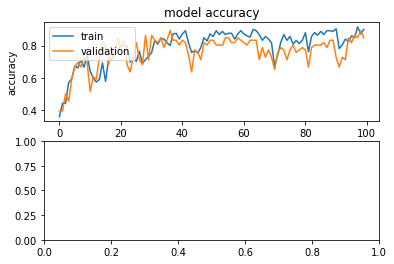

In [196]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()